In [45]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

In [46]:
df=pd.read_csv("height-weight.csv")

In [47]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


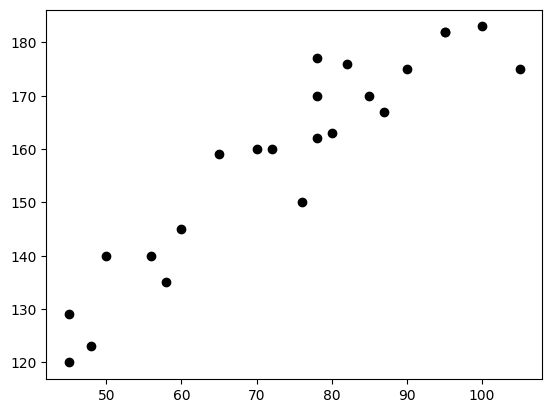

In [48]:
plt.scatter(df.Weight, df.Height,color='black',label='Actual Data')

In [49]:
x=df[["Weight"]] #independent feature
y=df["Height"] #dependent  featuure 

In [50]:
x

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [51]:
y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1);

In [53]:
x_train.shape , y_train.shape , x_test.shape , y_test.shape

((18, 1), (18,), (5, 1), (5,))

In [54]:
#Scalling Standardization >> fit_transform >> train , transform >> test

In [55]:
#only train data is used for fitting as the test data doesn't exist in  real world so we cannot calculate the miu and sigma of test data 
#thus only the tansformation isdone in the training data 


In [56]:
#Scalling is optional as it doesn't change the distribution of te data 
#y/target Variable should not be scaled 
#avoid Scaling catedgorical feature
#Scaler should alway abe done after the train test split otherwise it will not give the standard result 
from sklearn.preprocessing import StandardScaler 

In [57]:
scaler = StandardScaler()

In [58]:
x_train=scaler.fit_transform(x_train)

In [59]:
x_test = scaler.transform(x_test)

In [60]:
#model Traing 
from sklearn.linear_model import LinearRegression 

In [61]:
regressor = LinearRegression()

In [62]:
regressor.fit(x_train,y_train)

LinearRegression()

In [63]:
regressor.coef_

array([17.73635106])

In [64]:
regressor.intercept_

158.88888888888889

In [65]:
regressor.predict(x_train)

array([132.97277388, 166.82239348, 154.12878613, 130.85717266,
       160.47558981, 164.70679226, 175.28479838, 141.43517878,
       169.99579532, 127.68377082, 162.59119103, 156.24438736,
       139.31957756, 162.59119103, 180.57380145, 191.15180757,
       180.57380145, 162.59119103])

TypeError: 'str' object is not callable

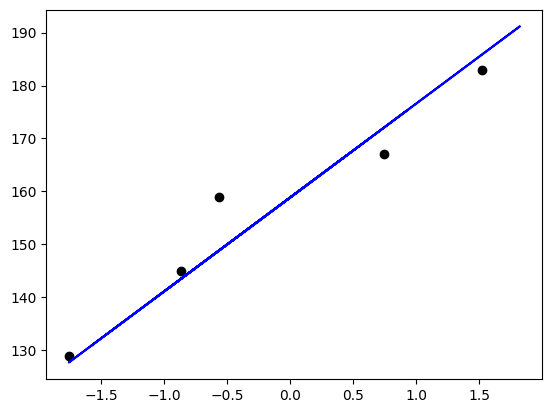

In [82]:
plt.scatter(x_test,y_test,color='black',label="Actual_data" )
plt.plot(x_train,regressor.predict(x_train),color='blue',label="Regression  model")
plt.xlabel("WEIGHT")
plt.ylabel("HEIGHT")
plt.legend()
plt.show()

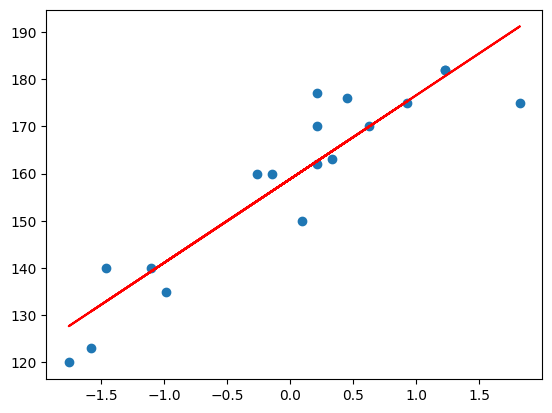

In [72]:
plt.scatter(x_train,y_train)
plt.plot(x_train,regressor.predict(x_train),'r')

In [73]:
y_pred_test=regressor.predict(x_test)

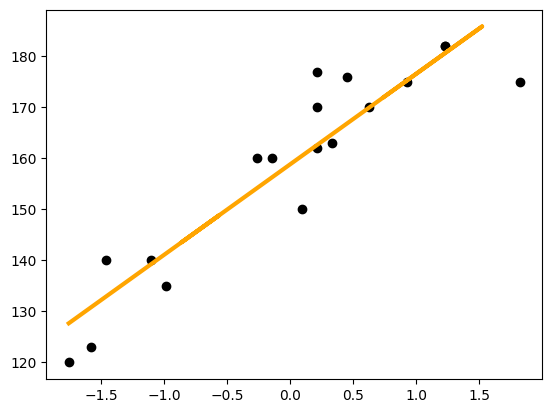

In [85]:
plt.scatter(x_train,y_train,color ='Black', label = 'Weight')
plt.plot(x_test,y_pred_test, color='orange', linewidth=3, label='Height')

In [86]:
#peroformance metrices 

In [87]:
from sklearn.metrics import mean_squared_error , mean_absolute_error

In [88]:
mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test , y_pred_test)
rmse = np.sqrt(mse)
print(mse, mae, rmse )

28.276946048811972 4.179973432576932 5.317607173232334


In [90]:
#Rsquare = 1-SSR/SST
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred_test)
score

0.9171832648523548

In [91]:
#adjusted R square 
#R2 = 1-[(1-R2)*(n-1)/(n-k-1)] #n is no of obs , k is no predictor variables
1-(1-score)*(len(y_test)-1)/(len(y_test))
#adjusted r square will be always be lesser than rsquare 

0.9337466118818838

In [93]:
#to get no of columns
x_test.shape[1]

1

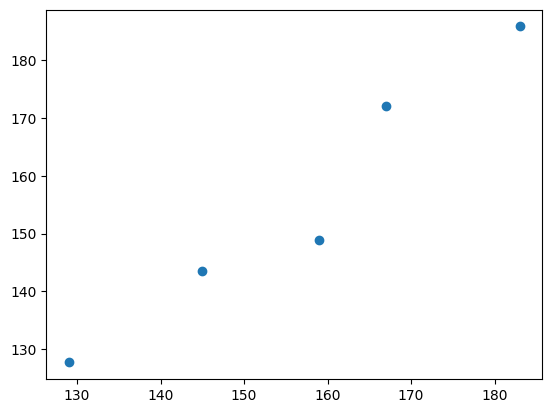

In [94]:
#assumption 
#x-y should have linear relationship
#observation should have no relation 
#error should have constant variance
#error should be normally distributed 
plt.scatter(y_test, y_pred_test)

In [98]:
error=y_test-y_pred_test 
error
import seaborn as sns 

C:\Users\KIIT\AppData\Local\Temp\ipykernel_7516\1068701192.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(error, kde=True)  #small amout of rightskewd data will be present  leaving this as the execption  our assumption is trur that error is normally distributed


<Axes: xlabel='Height', ylabel='Density'>

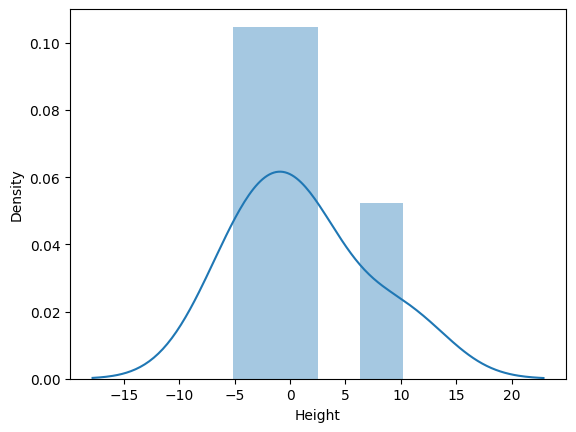

In [100]:
sns.distplot(error, kde=True)  #small amout of rightskewd data will be present  leaving this as the execption  our assumption is trur that error is normally distributed    

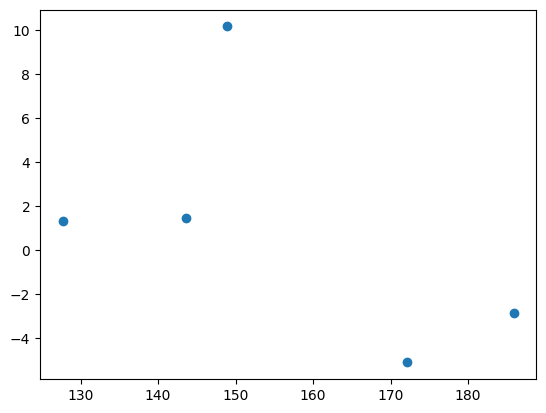

In [101]:
#error should have constant varaince 
plt.scatter(y_pred_test, error)